In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

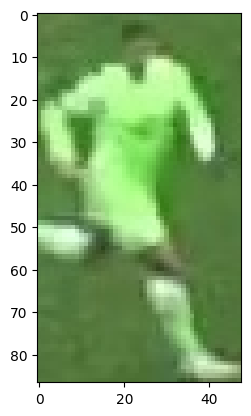

In [31]:
path = r'/Users/user/Documents/personal_projects/football_analysis_cv/output_videos/cropped_image.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

#### Take the top half of the image

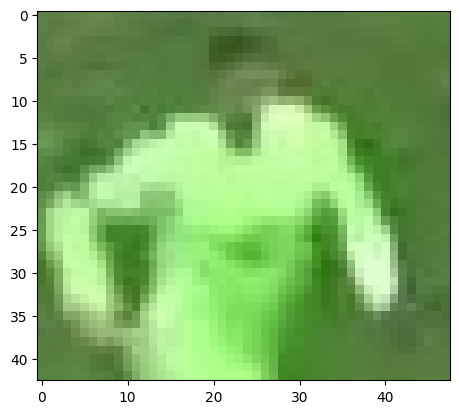

In [32]:
top_half_image = img[0:int(img.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

### Cluster the image into 2 colours

In [33]:
img.shape

(87, 48, 3)

In [34]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)
print(image_2d.shape)

(2064, 3)


In [35]:
# perform k means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

KMeans(n_clusters=2, random_state=0)

[1 1 1 ... 1 1 1]


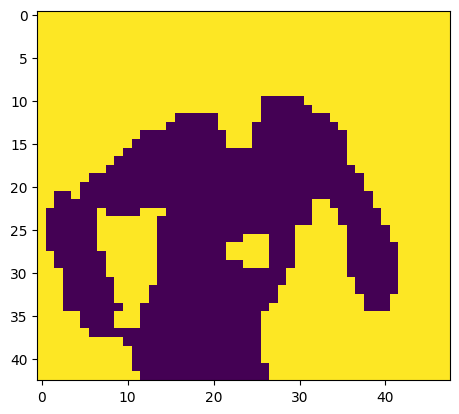

In [36]:
#get cluster label
labels = kmeans.labels_
print(labels) #prediction of each pixel

#rehape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#plot the segmented image
plt.imshow(clustered_image)

In [39]:
corner_cluster = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
print(corner_cluster)
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)
print(non_player_cluster)

[1, 1, 1, 1]
1


In [40]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [ ]:
#gives the player jersey colour
kmeans.cluster_centers_[player_cluster]


array([170.26648721, 235.62449529, 142.0538358 ])